# 4MSLP - Projet

## TITANIC


298261 LARIBIERE Bruno - 303021 CLEMENT Mona 

 ## 1 - Chargement des données
 Nous chargeons les données depuis le fichier CSV

In [29]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

#read entire file
titanic_src = pd.read_csv('titanic.csv',
                         #Nous ne prenons pas les headers de la première ligne 
                         skiprows=[0],
                         names=['pclass','survived','name','sex','age','sibsp','parch','ticket','fare','cabin','embarked','boat','body','home.dest'])
#Nous affichons les premières lignes du tableau
titanic_src.head()

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

     age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.00      0      0   24160  211.3375       B5        S    2    NaN   
1   0.92      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.00      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

## 2 - Analyse des variables

### pclass
Indique la classe du passager. On voit qu'une majeure partie des passagers était en 3ème classe.

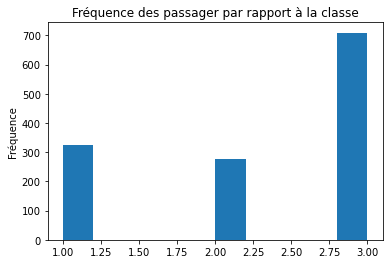

In [2]:
pclass = titanic_src['pclass']

plt.hist(pclass, label='Class')
_ = plt.gca().set(title='Fréquence des passager par rapport à la classe', ylabel='Fréquence')

### Survived
Cette variable nous indique le nombre de survivant

On remarque ainsi que seul 38% des personnes ont survécu.

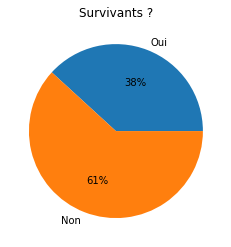

In [3]:
psurvived = titanic_src['survived']

died = list(filter(lambda x: x == 0, psurvived))
alive = list(filter(lambda x: x  == 1, psurvived))


plt.pie([len(alive),len(died)],autopct='%1.1i%%',labels = ['Oui', 'Non'])
_ = plt.title('Survivants ?')


### Name
Cette variable indique le nom dees passagers. Pas de statistique particulière.

### Sex
Indique le sexe des passagers embarqués.
On observe qu'une majorité de femmes a survécu par rapport aux hommes.

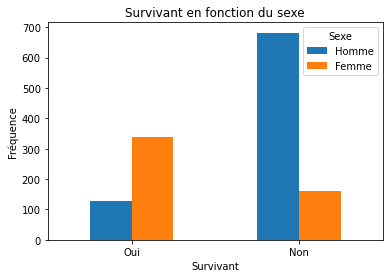

In [4]:
psurv = pd.crosstab(titanic_src['sex'], titanic_src['survived'])
psurv.plot(kind='bar')
plt.title('Survivant en fonction du sexe')

plt.xlabel('Survivant')
plt.ylabel('Fréquence')

#indicateur haut à droite
plt.legend(['Homme', 'Femme'], title='Sexe')

#Légende sur les bars pour plus de clareté au lieu de 0 ou 1
_ = plt.xticks([0, 1], ['Oui', 'Non'], rotation=0)

### Age
Indique l'âge des passagers.
On en conclut qu'une grande partie des très jeunes ont survécu mais à partir d'environ 18 ans le taux de mortalité est élevé.

In [5]:
groupway = titanic_src.groupby(['survived'])['age']
plt.title('Mort en fonction de l âge')

#De 0 à 100 ans par paquet de 5 années
groupway.plot(kind='hist', bins=range(0, 100, 5),alpha=0.5)
_= plt.legend(['Mort', 'Survivant'], title='Survivant')

### sibsp
Indique le nombre de frères et soeurs ou de conjoints à bord par rapport à l'individu.

Au vu des statistiques, il y avait de très fortes chances de survie lorsque que nous avions au moins 1 proche avec nous pour le voyage.
Etre seul ramenait les chances de survie à environ 50%.

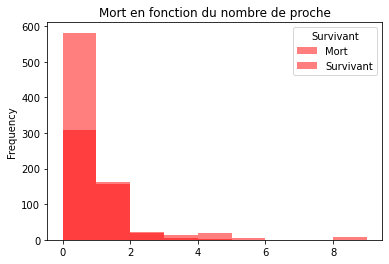

In [6]:
groupway = titanic_src.groupby(['survived'])['sibsp']
plt.title('Mort en fonction du nombre de proche')

groupway.plot(kind='hist', bins=range(0, 10, 1),alpha=0.5,color ='r')
_= plt.legend(['Mort', 'Survivant'], title='Survivant')

### parch
Indique le nombre de parents et d'enfants à bord en rapport avec l'individu.
Même conclusion qu'au dessus, il semble qu'être seul signifiait être plus exposé à la mort.

In [7]:
groupway = titanic_src.groupby(['survived'])['parch']
plt.title('Mort en fonction du nombre de parrant')
groupway.plot(kind='hist', bins=range(0, 10, 1),alpha=0.5,color ='g')
_= plt.legend(['Mort', 'Survivant'], title='Survivant')

### ticket
Indique le numéro du ticket, pas d'analyse possible, les tickets ont des numéros chiffrés et lettrés.

### fare
Indique le tarif du billet du passager.
À priori, plus le billet était payé à bas coût plus les chances de mourir étaient importantes.
Si on compare avec le fait d'être en 3ème classe alors on voit clairement que c'était un facteur déterminant à la mort du passager.

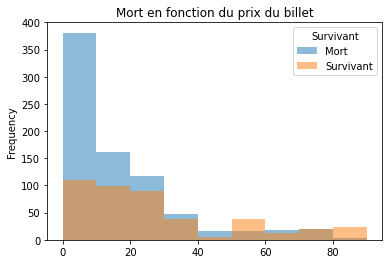

In [8]:
groupfare = titanic_src.groupby(['survived'])['fare']
plt.title('Mort en fonction du prix du billet')

#De 0 à 100 ans par paquet de 5 années
groupfare.plot(kind='hist', bins=range(0, 100, 10),alpha=0.5)
_= plt.legend(['Mort', 'Survivant'], title='Survivant')

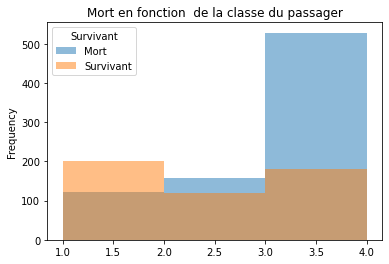

In [9]:
groupfare = titanic_src.groupby(['survived'])['pclass']
plt.title('Mort en fonction  de la classe du passager')

#De 0 à 100 ans par paquet de 5 années
groupfare.plot(kind='hist', bins=range(1, 5, 1),alpha=0.5)
_= plt.legend(['Mort', 'Survivant'], title='Survivant')

### cabin
Indique le numéro de la cabine.
Impossible d'analyser cette donnée.

### embarked
Indique le port d'embarquation.
(C = Cherbourg; Q = Queenstown; S = Southampton)

La majeur partie des personnes étaient en provenance de Southampton.
Pas de conclusion vis à vis de cette analyse.

In [10]:
groupembark = pd.crosstab(titanic_src['embarked'], titanic_src['survived'])
groupembark.plot(kind='bar')
plt.title('Mort en fonction  de la classe du passager')
_= plt.legend(['Mort', 'Survivant'], title='Survivant')

### boat
Indique l'accès à un système de survie.
Impossible de comprendre à quoi correspond les valeurs de la colonne, on peut cependant très largement avancer que l'accès à un système de survie type bateau de sauvetage assurait largement la survie.

In [11]:
groupembark = pd.crosstab(titanic_src['boat'], titanic_src['survived'])
groupembark.plot(kind='bar')
plt.title('Mort en fonction du type d embarquation')
_= plt.legend(['Mort', 'Survivant'], title='Survivant')

### body
Indique le numéro d'identification du corps, pas d'analyse à faire sur cette variable.

### home.dest
Indique la destination finale du passager.
Trop de destinations différentes et surtout trop grande quantité d'informations manquantes. Ne permet pas d'analyser cette colonne.

## 3 - Séparation des données

Au vue des analyses précédentes on selectionne les colonnes qui sont pertinentes pour l'application de nos futures algorithmes :

In [12]:
rawdata = titanic_src[['pclass', 'sex', 'age', 'sibsp', 'parch','embarked']]

#On met bien de côté la valeur à analyser et à prédire
rawsurvive = titanic_src['survived']

In [13]:
#on importe le nécessaire de sklearn pour notre JDD
from sklearn.model_selection import train_test_split

#Random state à 0 car on veut garder tjrs les mêmes JDD à chaque calcul.
#Peut être changé si on veut tester d'autres configurations
X_train, X_test, Y_train, Y_test = train_test_split(rawdata, rawsurvive, random_state=0)

## 4 - Preprocess data

In [14]:
#On importe tout le matériel dont on aura besoin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

#### Les valeurs numériques

In [15]:
#On met de côté les valeurs de type numérique
numericcol = ['age', 'sibsp' , 'parch']

#On décrit le processus de transformation des valeurs via une pipeline.
numericValuesTransf = Pipeline(
    
    #Avec le SimpleImputer on remplace toutes les valeurs vide par la médiane 
    #des valeurs associées
    steps=[('imputer', SimpleImputer(strategy='median')),
    
    #On effectue une mise à l'échelle, toutes les données vont être
    #remise sur un range de -1 à 1.
    #Cela nous permet d'avoir une cohérence entre toutes nos valeurs numériques
    ('scaler', MinMaxScaler())]
    
)

#### Les valeurs de catégories

In [16]:
#On met de côté les valeurs de type catégorie
categorycol = ['pclass', 'sex' , 'embarked']

categoricValuesTransf = Pipeline(
    
    #Pareil qu'au dessus sauf que l'on remplace les valeurs éventuellement 
    #vides par la valeur la plus fréquente car ca peut ne pas être du numérique
    steps=[('imputnum', SimpleImputer(strategy='most_frequent')),
     
    #Va nous permettre de créer plusieurs colonnes qui correspondent aux
    #différentes catégories et binarise le résultat.
    #Par exemple une colonne "sexe" avec valeur 0 et 1
    #Sera transformée en une colonne "HOMME" 0/1 et "FEMME" 0/1
    ('inputcat', OneHotEncoder())]
)

#### La transformation des colonnes

In [17]:
colTransformation = ColumnTransformer(
    ##On supprime les colonnes qui n'auraient pas été traitées
    remainder = 'drop',
    
    #On intègre nos traitements de colonnes dans le ColumnTransformer
    transformers=[
        ('numeric', numericValuesTransf, numericcol),
        ('categorical', categoricValuesTransf, categorycol)
])

In [18]:
#On transforme nos deux catégories modèle et test
xTrainCleaned = colTransformation.fit_transform(X_train)
xTestCleaned = colTransformation.fit_transform(X_test)

#Pas besoin de transformer la partie Y car déjà en binaire
yTrainCleaned = Y_train
yTestCleaned = Y_test

## Helper
La fonction ci dessous va nous permettre d'analyser les metrics classiques et de sortir un graphique par rapport à un algo donné en paramètre

Cela nous évite de répéter plusieurs fois le code

In [19]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

def run_analyse(customrange,algorithm):
    f1Results = []
    precisionResults = []

    #Brute forchttp://localhost:8888/notebooks/4mslp%20-%20298261%20-%20LARIBIERE%20Bruno_303021%20-%20CLEMENT%20Mona.ipynb#5---k-NN-(Plus-proche-voisin)e {customrange} fois
    for variation in customrange:

        #Execute l'algorithme passé en tant que lambda et 
        #donne en sortie la prédiction y
        yprediction = algorithm(variation)

        f1score = f1_score(yTestCleaned,yprediction)
        precision = precision_score(yTestCleaned,yprediction)
        recall = recall_score(yTestCleaned,yprediction)
        conf = confusion_matrix(yTestCleaned,yprediction)

        f1Results.append(f1score)
        precisionResults.append(precision)
    
    #Création du graphique
    f,a = plt.subplots(1)
    a.plot(f1Results)
    a.set_ylabel('Précision, 1=100%')
    _ = a.plot(precisionResults)

## 5 - k-NN (Plus proche voisin)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

def knn_algo(variation):
    #On instancie le knn
    kc = KNeighborsClassifier(n_neighbors = variation)

    #On lui donne les data d'entrainement x et y
    kc.fit(xTrainCleaned,yTrainCleaned)

    #On effectue la prédiction
    return kc.predict(xTestCleaned)

run_analyse(range(1,150),lambda variation: knn_algo(variation))

Nous venons de bruteforcer des modifications de paramètres et nous regardons maintenant celui qui est le plus approprié.
Nous concluons donc ici que notre modèle est optimale avec un paramètre n_neighbors au moins égale à 120

## 6 - Support Vector Marchine (machine à vecteurs de support)

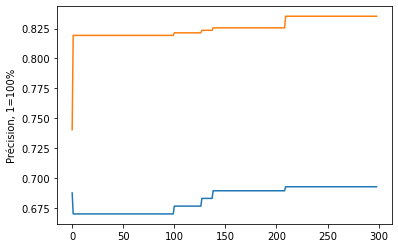

In [21]:
from sklearn.svm import SVC


def svc_algo(variation):

    #On prépare l'algo avec la variation
    svctrainer = SVC(gamma='auto', C = variation)
    #On ajoute les datas
    svctrainer.fit(xTrainCleaned, yTrainCleaned) 

    #On effectue la prédiction
    return svctrainer.predict(xTestCleaned)

run_analyse(range(1,300),lambda variation: svc_algo(variation))




On en conclut donc que le meilleur paramètre C pour un algo SVM serait au minimum 200

## 7 - Linear Discriminant Analysis (Analyse discriminante linéaire)

In [22]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

def lda_algo(variation):

    #Cast LDA
    lda = LDA(tol = variation)
    #Fit data
    lda.fit(xTrainCleaned,yTrainCleaned)
    
    #Faire la prédiction
    return lda.predict(xTestCleaned)

#On utilise un custom range car range() est pour les int non les float
customRange = np.arange(0.01, 1, 0.01)
run_analyse(customRange,lambda variation: lda_algo(variation))


On en conclut que le meilleur paramétrage pour le LDA serait avec une tolérence de 0.75 environ.

## 8 - Logistic Regression (Régression logistique)

In [23]:
from sklearn.linear_model import LogisticRegression as LR


def lr_algo(variation):

    #Cast LR
    lr = LR(C = variation)
    #Fit data
    lr.fit(xTrainCleaned,yTrainCleaned)
    
    #Faire la prédiction
    return lr.predict(xTestCleaned)


run_analyse(range(1,125),lambda variation: lr_algo(variation))


Pour ce qui est de la régression logistique le meilleur paramètre semble être un paramètre au minimum supérieur à 3.

## 9 - Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

## 10 - Voting classifier

In [25]:
from sklearn.ensemble import VotingClassifier 


## 11 - Random Forest

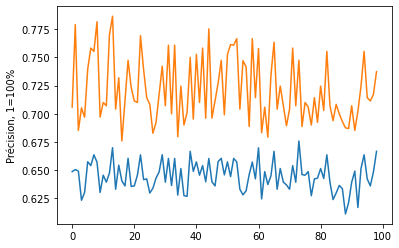

In [26]:
from sklearn.ensemble import RandomForestClassifier as RF

def rf_algo(variation):

    #Cast RF
    rf = RF(random_state=variation)
    #Fit data
    rf.fit(xTrainCleaned,yTrainCleaned)
    
    #Faire la prédiction
    return rf.predict(xTestCleaned)

run_analyse(range(1,100),lambda variation: rf_algo(variation))


On remarque qu'avec cet algorithme le résultat est très variable en fonction de l'état initial.
On ne préfère pas s'avancer sur un paramètre optimal.

## 12 - Gradient boosting

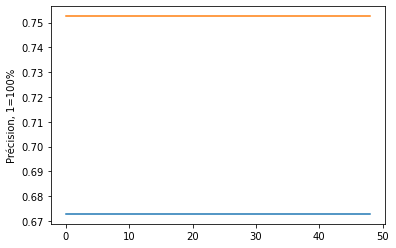

In [27]:
from sklearn.ensemble import GradientBoostingClassifier as GBC

def gbc_algo(variation):

    #Cast GBC
    gbc = GBC(random_state=variation)
    #Fit data
    gbc.fit(xTrainCleaned,yTrainCleaned)
    
    #Faire la prédiction
    return gbc.predict(xTestCleaned)

#On stop à 50 car au delà pas de changement
run_analyse(range(1,50),lambda variation: gbc_algo(variation))

Sur le gradient boosting nous n'observons pas de changement de valeur en fonction de l'état initial

## 13 - AdaBoost

In [28]:
from sklearn.ensemble import AdaBoostClassifier as AC

def ac_algo(variation):

    #Cast AC
    ac = AC(random_state=variation)
    #Fit data
    ac.fit(xTrainCleaned,yTrainCleaned)
    
    #Faire la prédiction
    return ac.predict(xTestCleaned)


run_analyse(range(1,50),lambda variation: ac_algo(variation))

De même que sur l'algorithme précédent, l'état n'importe pas sur le résultat.

## 14 - Performance

Au vu des résultats obtenus avec les algorithmes précédents, il semblerait que le plus parlant soit
k-NN (Plus proche voisin). En effet, les résultats semblent les plus cohérents.
